In [1]:
from eagles.Supervised.tuner import SupervisedTuner
import pandas as pd

In [2]:
from eagles.data_sets import data_loader as dl

iris = dl.load_iris()
iris.shape

(150, 5)

In [3]:
species = pd.get_dummies(iris['species'])
iris = pd.concat([iris, species], axis=1)
iris.drop(['species'], axis=1, inplace=True)

fts = ['sepal_width', 'petal_length', 'petal_width', 'setosa', 'versicolor', 'virginica']

## Simple linear regression

Performing CV Runs: 5
Finished cv run: 1 time: 0.0126
Finished cv run: 2 time: 0.0103
Finished cv run: 3 time: 0.0095
Finished cv run: 4 time: 0.0112
Finished cv run: 5 time: 0.0104


,cv run,rmse_scores,mae_scores
0,1,0.291801,0.226453
1,2,0.295828,0.217582
2,3,0.338605,0.270146
3,4,0.315532,0.258746
4,5,0.296110,0.260238
5,mean,0.307575,0.246633
6,std,0.017575,0.020668


Final cv train test split
rmse score: 0.2961
mae score: 0.2602
Pearson correlation between y_true and y_pred: 0.9564


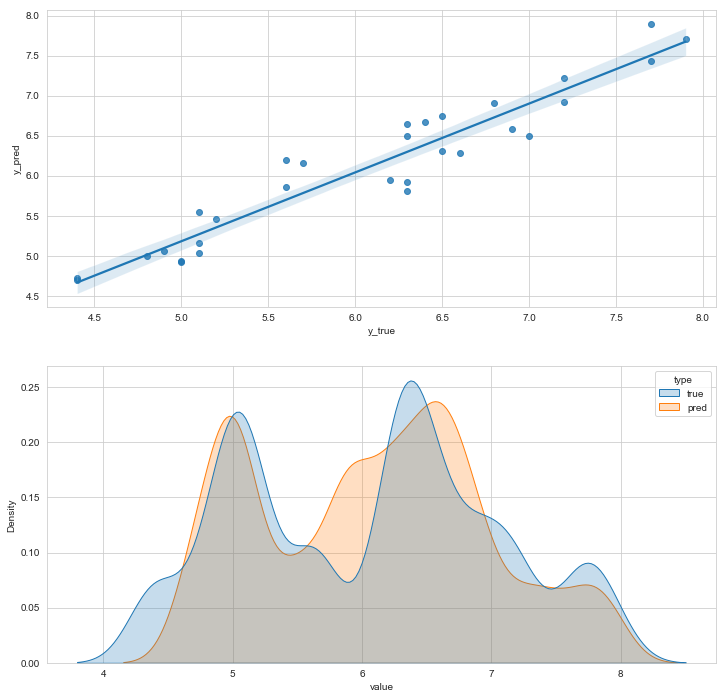

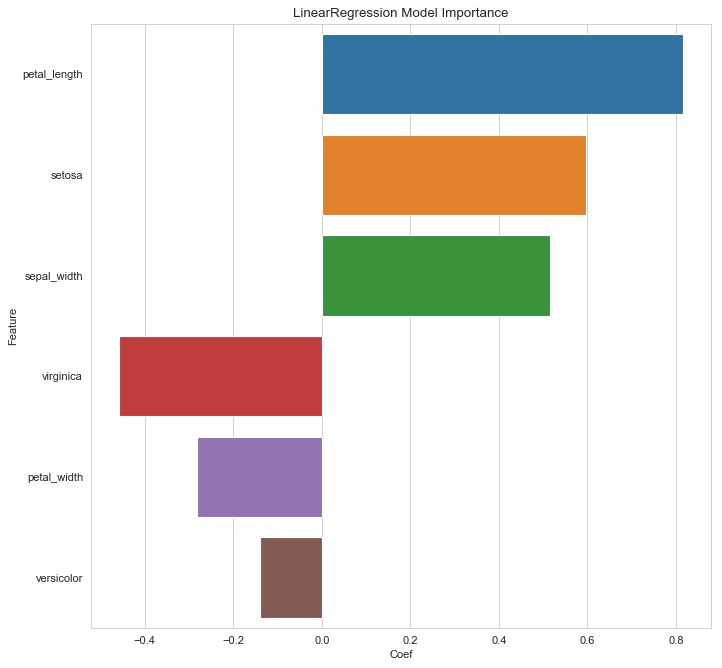

In [4]:
tuner = SupervisedTuner(
    problem_type='regress',
    eval_metrics=["rmse", "mae"],
    cv_method='kfold',
    num_cv=5,
    num_top_fts=None,
    get_ft_imp=True,
    random_seed=4,
    disp=True,
    log="log",
    log_name="simple_linreg_test.txt",
    log_path=None,
    log_note="Linear regression test",
)

res = tuner.eval(
    X=iris[fts],
    y=iris["sepal_length"],
    model="linear",
    params={},
    pipe=None,
    scale=None,
    select_features=None,
)

## ExtraTrees Regressor with Standard Scaling

Final pipeline: StandardScaler, ExtraTreesRegressor, 
Performing CV Runs: 5
Finished cv run: 1 time: 0.285
Finished cv run: 2 time: 0.2859
Finished cv run: 3 time: 0.3254
Finished cv run: 4 time: 0.3326
Finished cv run: 5 time: 0.3364


,cv run,rmse_scores,mae_scores
0,1,0.336235,0.273150
1,2,0.254364,0.190850
2,3,0.390457,0.288817
3,4,0.380696,0.308800
4,5,0.365622,0.308400
5,mean,0.345475,0.274003
6,std,0.049105,0.043655


Final cv train test split
rmse score: 0.3656
mae score: 0.3084
Pearson correlation between y_true and y_pred: 0.9414


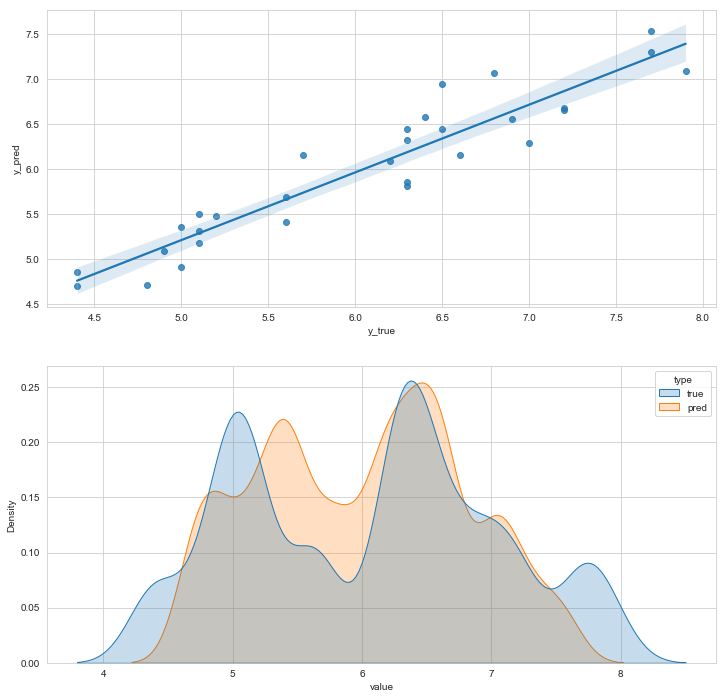

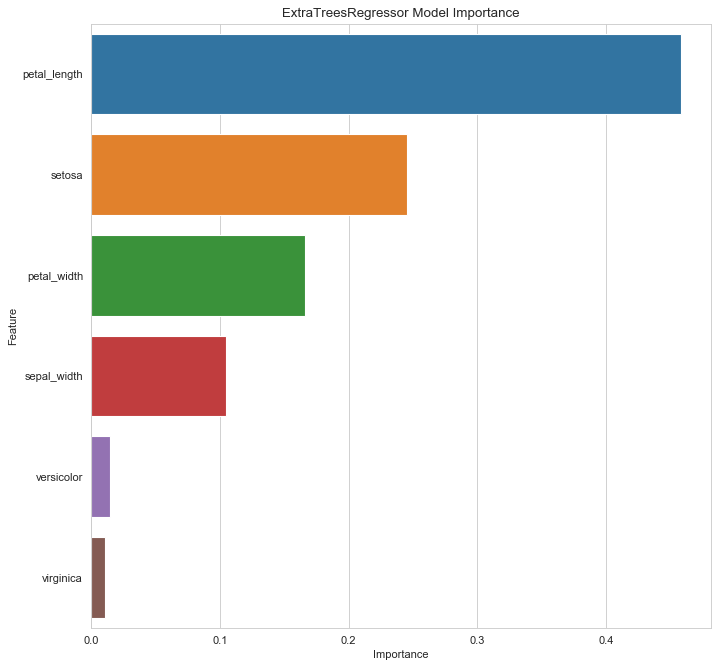

In [5]:
tuner = SupervisedTuner(
    problem_type='regress',
    eval_metrics=["rmse", "mae"],
    cv_method='kfold',
    num_cv=5,
    num_top_fts=None,
    get_ft_imp=True,
    random_seed=4,
    disp=True,
    log="log",
    log_name="etr_stndard_scaling.txt",
    log_path=None,
    log_note="Extra Trees with standard scaling",
)

res = tuner.eval(
    X=iris[fts],
    y=iris["sepal_length"],
    model="et_regress",
    params={},
    pipe=None,
    scale="standard",
    select_features=None,
)

## Voting Regressor with scaling and select features

Final pipeline: StandardScaler, SelectKBest, VotingRegressor, 
Performing CV Runs: 3
Finished cv run: 1 time: 0.5874
Finished cv run: 2 time: 0.4499
Finished cv run: 3 time: 0.4389


,cv run,rmse_scores,mae_scores
0,1,0.344041,0.278927
1,2,0.367271,0.289365
2,3,0.367509,0.298647
3,mean,0.359607,0.288980
4,std,0.011007,0.008056


Final cv train test split
rmse score: 0.3675
mae score: 0.2986
Pearson correlation between y_true and y_pred: 0.9214


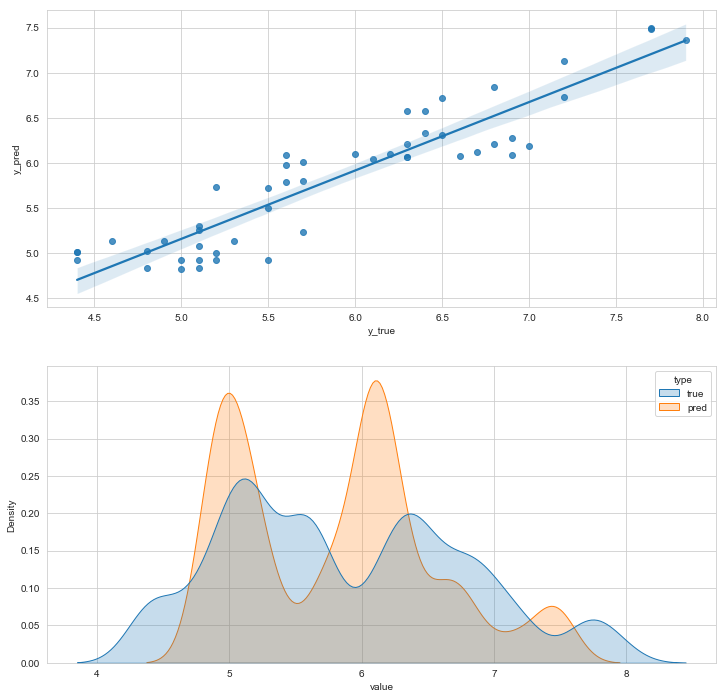

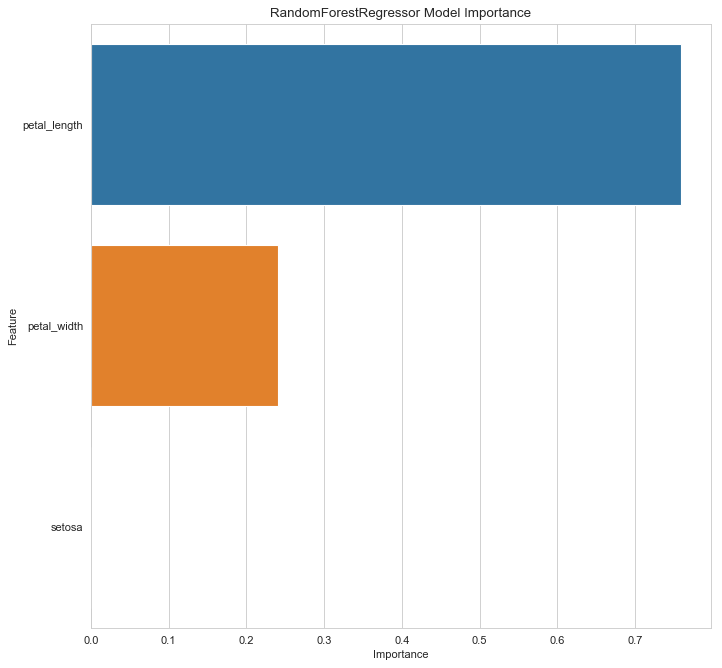

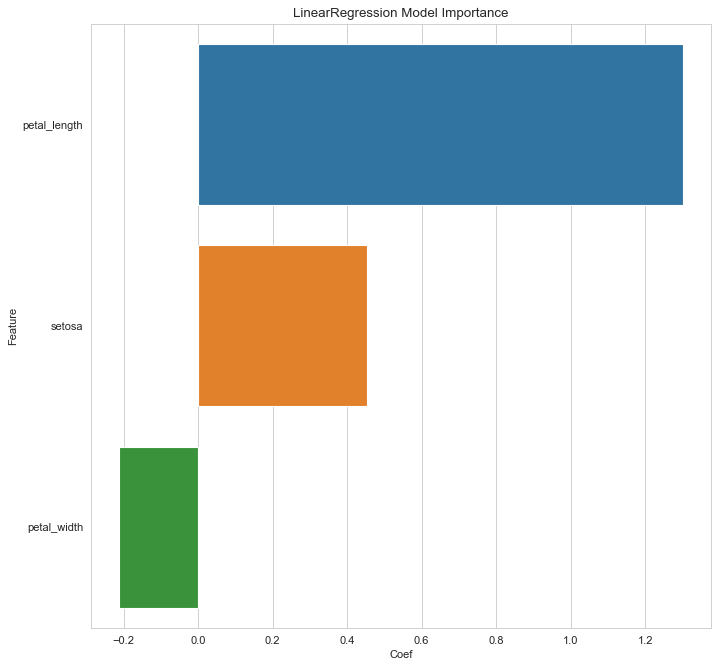

In [6]:
tuner = SupervisedTuner(
    problem_type='regress',
    eval_metrics=["rmse", "mae"],
    cv_method='kfold',
    num_cv=3,
    num_top_fts=None,
    get_ft_imp=True,
    random_seed=4,
    disp=True,
)

res = tuner.eval(
    X=iris[fts],
    y=iris["sepal_length"],
    model="vc_regress",
    params={},
    pipe=None,
    scale="standard",
    select_features="selectkbest",
)

## XGB Regression with Robust Scaling

Final pipeline: RobustScaler, XGBRegressor, 
Performing CV Runs: 3
Finished cv run: 1 time: 0.2293
Finished cv run: 2 time: 0.0823
Finished cv run: 3 time: 0.0732


,cv run,rmse_scores,mae_scores
0,1,0.352332,0.280727
1,2,0.417071,0.322691
2,3,0.388364,0.312961
3,mean,0.385922,0.305460
4,std,0.026486,0.017934


Final cv train test split
rmse score: 0.3884
mae score: 0.313
Pearson correlation between y_true and y_pred: 0.9061


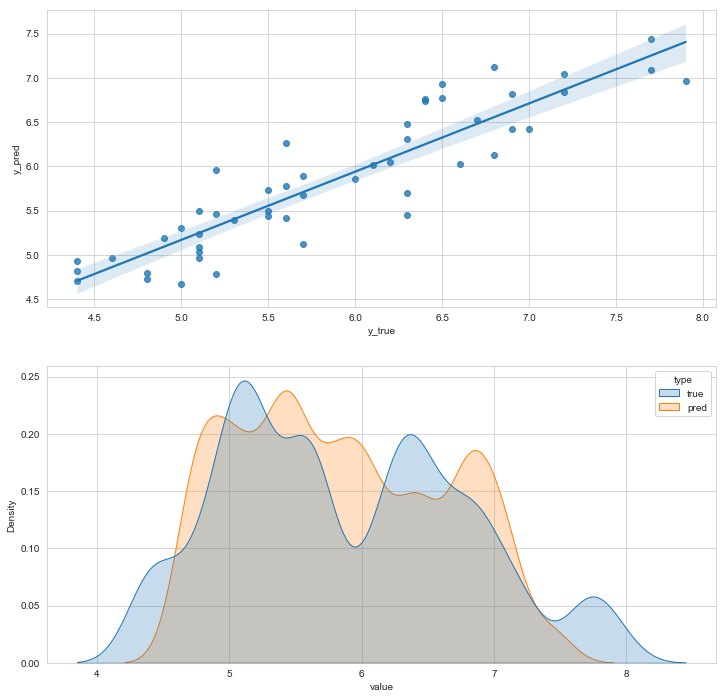

In [7]:
tuner = SupervisedTuner(
    problem_type='regress',
    eval_metrics=["rmse", "mae"],
    cv_method='kfold',
    num_cv=3,
    num_top_fts=None,
    get_ft_imp=True,
    random_seed=4,
    disp=True,
)

res = tuner.eval(
    X=iris[fts],
    y=iris["sepal_length"],
    model="xgb_regress",
    params={},
    pipe=None,
    scale="robust",
    select_features=None,
)

## Bayes Search RandomForest Regressor Parameter Tuning

Final pipeline: StandardScaler, RandomForestRegressor, 
Performing parameter tuning using: grid_cv
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   16.5s finished


neg_mean_squared_error score of best estimator during parameter tuning: -0.11023294029297925

Parameters of the best model: 

RandomForestRegressor Parameters
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 4, 'verbose': 0, 'warm_start': False}

Performing CV Runs: 5
Finished cv run: 1 time: 0.7604
Finished cv run: 2 time: 0.8246
Finished cv run: 3 time: 0.6964
Finished cv run: 4 time: 0.6268
Finished cv run: 5 time: 0.5813


,cv run,rmse_scores,mae_scores
0,1,0.298058,0.243691
1,2,0.266633,0.207408
2,3,0.388878,0.308388
3,4,0.366046,0.301390
4,5,0.325604,0.278230
5,mean,0.329044,0.267821
6,std,0.044309,0.037717


Final cv train test split
rmse score: 0.3256
mae score: 0.2782
Pearson correlation between y_true and y_pred: 0.9521


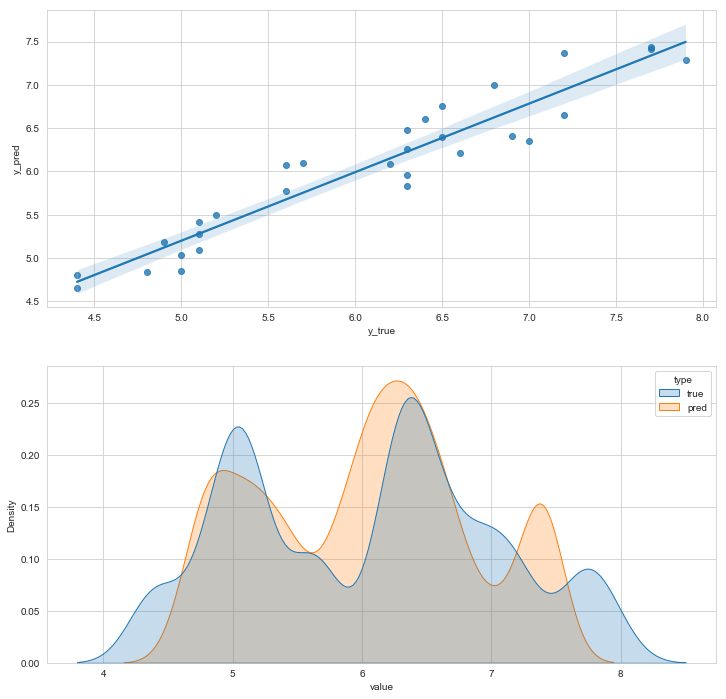

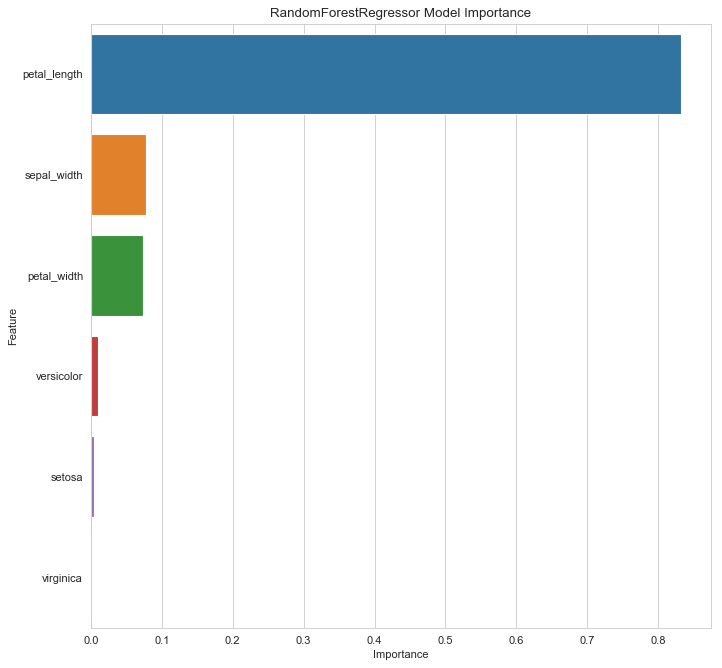

In [8]:
pars = {
    'max_depth':[3,5,10]
    ,'n_estimators':[100, 200]
    ,'random_state':[4]
}

tuner = SupervisedTuner(
    problem_type='regress',
    tune_metric="mse",
    tuner="grid_cv",
    eval_metrics=["rmse", "mae"],
    cv_method='kfold',
    num_cv=5,
    num_top_fts=None,
    get_ft_imp=True,
    random_seed=4,
    disp=True,
    log="log",
    log_name="rfr_bayessearch.txt",
    log_path=None,
    log_note="Random Forest with bayes param search",
)

res = tuner.eval(
    X=iris[fts],
    y=iris["sepal_length"],
    model="rf_regress",
    params=pars,
    pipe=None,
    scale="standard",
    select_features=None,
)